**왓챠피디아(https://peida.watcha.com/ko-KR) 리뷰 분석**
- *기묘한 이야기 시즌 1*의 한국어 리뷰 크롤링 및 전처리
- N-gram Count 이용, Bigram으로 동시 발생 횟수를 집계해 PMI 계산
- 동시발생 행렬 생성해 PPMI 계산
- 워드클라우드 생성

### 1. 크롤링

In [ ]:
from selenium.webdriver import Chrome
from selenium.webdriver.support.ui import WebDriverWait as wait
import pandas as pd
import re
import time
import numpy as np

In [ ]:
driver = Chrome("./chromedriver.exe")
url = "https://pedia.watcha.com/ko-KR/contents/tR286el/comments" # 기묘한 이야기 시즌1 리뷰
driver.get(url)
time.sleep(20)

In [ ]:
#페이지 스크롤하기
last_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
while True: 
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);") 
    time.sleep(4.0) 
    new_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
            
    if new_page_height == last_page_height: 
        break 
    last_page_height = new_page_height

In [ ]:
# 전체 코멘트 중 567개 크롤링
reviews = []
driver.implicitly_wait(1)
for i in range(1,567):
    review = driver.find_element_by_xpath("""//*[@id="root"]/div/div[1]/section/section/div/div/div/ul/div["""+str(i)+"""]/div[2]/div/span""")
    reviews.append(review.text)

In [ ]:
reviews

['아이들에 대한 묘사가 너무 절묘하다. 유난히 똑똑한 아이들임을 보여주면서도 순진함 속에 그들은 그들만의 규칙이 있다. 어리다고 미성숙하게만 그리는 게 아니라 하나의 인격체로서 다룸. 일레븐한테 가발 씌우는 의미 불명의 행태를 빼면 굉장히 재밌게 봤다. 시즌 2가 나와주길 기대.',
 "스토리, 음악, 캐릭터까지 '슈퍼 에이트'보다 더 7080스럽고 사랑스럽지만 동시에 중독성 강한 SF호러. 아동, 하이틴, 미스터리를 모두 아름답게 조화시키며 깜찍함과 공포를 둘 다 느낄 수 있는 러브레터 이상의 수작.",
 '왜 아무도 바브에게 관심을 쏟지 않는 거죠...',
 '재밌을랑말랑하는 기묘함',
 '취향은 아니지만 보는것을 멈출수가없었네요..',
 '넷플릭스가 벼룩일세.',
 '이빨빠진 아이 너무 귀엽다',
 '조나단 얼굴 꿀잼 조나단 얼굴 개연성',
 "나도 모르게 계속 보게 만드는 몰입감이란...\n- 미국 80년대의 완벽 재현(80년대 복고 느낌은 우리나라나 미국이나 너무 좋다)\n- 처음 시작 BGM이 나올 때마다 떨린다\n- 아역 들의 앞날이 기대된다(특히 '일레븐'역의 밀리 바비 브라운)",
 '하루만에 시즌 다본다더니 그말이 맞다. 앉은자리에서 끝까지 시청! 사운드 연출 배경 연기 스토리 모두 훌륭하다.',
 '슈퍼 8 + ET + 구니스 + 엑스파일을 보는것 같은 스릴러 + 호러 + 성장 드라마...위노나 라이더 많이 늙었구나...',
 '',
 '옛날 미국 분위기를 잘 살렸으나 이야기의 전개가 너무 느려서 중간에 그만 볼까싶었지만 꾹꾹참아서 다봤다. 하지만 그만큼 후반부의 몰입도는 장난이 없었다 대략 8시간이 아깝지만은 않았던 작품',
 '제목만 보고서는 시시한 유령이야기인 줄 알았는데 미국이 제일 잘 하는 장르였다. 공상과학에 음모론을 더하고 하이틴 로맨틱 코미디를 뿌려낸 미스터리 스릴러!',
 '이것 하나만으로도 넷플릭스의 구독가치가 생겼다.\n소위 말하는 크리처물중에서 정말 괜찮은 작품이 나왔다. 영화”그것” 이 공포호러를 포장에 틴에이지성장

In [ ]:
movie_review = pd.DataFrame(columns = ['코멘트'])
for k in range(len(reviews)):
    new_data = {'코멘트' : reviews[k]}
    movie_review = movie_review.append(new_data, ignore_index=True)
    
movie_review.to_csv("./왓챠피디아 기묘한 이야기 시즌1 코멘트.csv", encoding = "utf-8-sig")

### 2. 리뷰 분석(과제 예시 참고)
- N-gram 이용, Bigram으로 동시 발생 횟수를 집계해 PMI 생성

In [ ]:
movie_review = pd.read_csv("./왓챠피디아 기묘한 이야기 시즌1 코멘트.csv",index_col = 0)
movie_review

,코멘트
0,아이들에 대한 묘사가 너무 절묘하다. 유난히 똑똑한 아이들임을 보여주면서도 순진함 ...
1,"스토리, 음악, 캐릭터까지 '슈퍼 에이트'보다 더 7080스럽고 사랑스럽지만 동시에..."
2,왜 아무도 바브에게 관심을 쏟지 않는 거죠...
3,재밌을랑말랑하는 기묘함
4,취향은 아니지만 보는것을 멈출수가없었네요..
...,...
561,시즌2의 예고편 같은 느낌
562,"하도 기묘한이야기 기묘한이야기 거려서 너무 기대하고봤남,,; 엄청 재밌진않은데 그렇..."
563,전혀 취향 아닌 장른데 하루만에 다 봄;
564,흑흑 ㅠㅠ 너무재밌는데\n무서워서 낮에만 봐야해... 너무 무서워 흑.....


In [ ]:
import string
movie_reviews = ''.join([str(m) for m in reviews not in string.punctuation])

In [ ]:
movie_reviews

'아이들에 대한 묘사가 너무 절묘하다 유난히 똑똑한 아이들임을 보여주면서도 순진함 속에 그들은 그들만의 규칙이 있다 어리다고 미성숙하게만 그리는 게 아니라 하나의 인격체로서 다룸 일레븐한테 가발 씌우는 의미 불명의 행태를 빼면 굉장히 재밌게 봤다 시즌 2가 나와주길 기대스토리 음악 캐릭터까지 슈퍼 에이트보다 더 7080스럽고 사랑스럽지만 동시에 중독성 강한 SF호러 아동 하이틴 미스터리를 모두 아름답게 조화시키며 깜찍함과 공포를 둘 다 느낄 수 있는 러브레터 이상의 수작왜 아무도 바브에게 관심을 쏟지 않는 거죠재밌을랑말랑하는 기묘함취향은 아니지만 보는것을 멈출수가없었네요넷플릭스가 벼룩일세이빨빠진 아이 너무 귀엽다조나단 얼굴 꿀잼 조나단 얼굴 개연성나도 모르게 계속 보게 만드는 몰입감이란  미국 80년대의 완벽 재현80년대 복고 느낌은 우리나라나 미국이나 너무 좋다  처음 시작 BGM이 나올 때마다 떨린다  아역 들의 앞날이 기대된다특히 일레븐역의 밀리 바비 브라운하루만에 시즌 다본다더니 그말이 맞다 앉은자리에서 끝까지 시청 사운드 연출 배경 연기 스토리 모두 훌륭하다슈퍼 8  ET  구니스  엑스파일을 보는것 같은 스릴러  호러  성장 드라마위노나 라이더 많이 늙었구나옛날 미국 분위기를 잘 살렸으나 이야기의 전개가 너무 느려서 중간에 그만 볼까싶었지만 꾹꾹참아서 다봤다 하지만 그만큼 후반부의 몰입도는 장난이 없었다 대략 8시간이 아깝지만은 않았던 작품제목만 보고서는 시시한 유령이야기인 줄 알았는데 미국이 제일 잘 하는 장르였다 공상과학에 음모론을 더하고 하이틴 로맨틱 코미디를 뿌려낸 미스터리 스릴러이것 하나만으로도 넷플릭스의 구독가치가 생겼다 소위 말하는 크리처물중에서 정말 괜찮은 작품이 나왔다 영화”그것” 이 공포호러를 포장에 틴에이지성장무비를 보여 주었다면 기묘한 이야기는 괴물이 등장하는 호러스릴러로서 10대 성장이야기를 “그것”보다 좀 더 디테일 스럽게 보여준다 드라마가 가진 훨등한 시간으로 극을 유연스럽고도 재치있게 풀어내면서도 이따금 호러스릴러로서 장

In [ ]:
stopwords = ['않다','에서','있다','없다','그렇다','아니다','것','이다','의','가','이','은','들', '주',
             '는','좀','잘','걍','과','도','을','를','으로','자','에','와','한','하다','휴','수' ,'일']

df = movie_review

# 불순어 제거
df['text'] = df['코멘트'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣1-9 ]","")
df['text'].replace('', np.nan, inplace=True)

# 결측치로 변한 행 제거
df = df.dropna()

def preprocess(x):  
  sent = x
  sent = ''.join([c for c in sent if c not in string.punctuation]) # 특수문자, 부호 제외하고, 문장별 단어리스트 생성
  sent = [word for word in sent.split() if word not in stopwords] # 불용어 제거하고 문장 분리 
  return sent

preprocessed = df['text'].apply(preprocess) #df.apply 행/열/전체원소에 대해 원하는 함수 지원
print(preprocessed[:10])

0    [아이들에, 대한, 묘사가, 너무, 절묘하다, 유난히, 똑똑한, 아이들임을, 보여주...
1    [스토리, 음악, 캐릭터까지, 슈퍼, 에이트보다, 더, 78스럽고, 사랑스럽지만, ...
2                      [왜, 아무도, 바브에게, 관심을, 쏟지, 않는, 거죠]
3                                      [재밌을랑말랑하는, 기묘함]
4                          [취향은, 아니지만, 보는것을, 멈출수가없었네요]
5                                        [넷플릭스가, 벼룩일세]
6                                  [이빨빠진, 아이, 너무, 귀엽다]
7                          [조나단, 얼굴, 꿀잼, 조나단, 얼굴, 개연성]
8    [나도, 모르게, 계속, 보게, 만드는, 몰입감이란, 미국, 8년대의, 완벽, 재현...
9    [하루만에, 시즌, 다본다더니, 그말이, 맞다, 앉은자리에서, 끝까지, 시청, 사운...
Name: text, dtype: object


#### N-gram Count

In [ ]:
from collections import Counter
from itertools import combinations 

unigram = Counter() # 한 단어의 빈도 수 
bigram = Counter() # 두 단어 조합의 빈도수 

for sent in preprocessed:  

  for word in sent:
    unigram[word] += 1   

  for w1, w2 in combinations(sent, 2): # bigram count (같은 단어의 쌍도 포함)
    bigram[(w1, w2)] += 1   

In [ ]:
print('전체 코퍼스 수: ' + str(len(unigram))) # 전체 코퍼스 수

전체 코퍼스 수: 5335


In [ ]:
min_count = (1/1000)*len(df)  # 저빈도 단어 제거
max_count = (1/50)*len(df) # 고빈도 단어 제거

for word in list(unigram.keys()): # 단어 리스트
  if unigram[word] < min_count or unigram[word] > max_count:
    del unigram[word]

print('제거 후 전체 코퍼스 수: ' + str(len(unigram))) 
print('Most common : ', unigram.most_common()[:25])

제거 후 전체 코퍼스 수: 5290
Most common :  [('재밌게', 11), ('않는', 11), ('보게', 11), ('뭔가', 11), ('레트로', 11), ('보면', 11), ('시즌1', 11), ('느낌', 11), ('스토리', 10), ('음악', 10), ('나도', 10), ('좋다', 10), ('끝까지', 10), ('드라마를', 10), ('모든', 10), ('1', 10), ('딱', 10), ('넷플릭스', 10), ('때', 10), ('애들이', 10), ('구니스', 9), ('많이', 9), ('하지만', 9), ('작품', 9), ('드라마가', 9)]


In [ ]:
# Bigram에서도 제거
for w1, w2 in list(bigram.keys()):
  if w1 not in unigram or w2 not in unigram: 
    del bigram[(w1, w2)]

#### 단어 간 관련도 계산 - PMI Matrix 생성

In [ ]:
word_to_id, id_to_word = {}, {} 

for id, word in enumerate(unigram.keys()):
    word_to_id[word] = id   
    id_to_word[id] = word

uni_sum = sum(unigram.values()) # 개별 단어 등장 횟수 sum
bi_sum = sum(bigram.values()) # 조합 등장 횟수 sum

# co-occurence matrix가 없는 대신, bigram에서 꺼내올 수 있음

from scipy.sparse import csc_matrix

ppmi_rates = Counter()
rates, rows, cols = [], [], []
eps = 1e-8
for (w1, w2), n in bigram.items(): # n은 bigram 발생 횟수
    rows.append(word_to_id[w1]) # 단어 인덱스 
    cols.append(word_to_id[w2])
    rates.append(max(0,np.log2( (n/bi_sum) / (unigram[w1]/uni_sum) / (unigram[w2]/uni_sum) + eps))) 

    ppmi_rates[(w1,w2)] = rates[-1]

#PPMI 행렬 생성
PPMI = csc_matrix((rates, (rows, cols)))
ppmi_rates.most_common()[:25] # 관련 있는 단어 상위 25개 출력

[(('아이들에', '묘사가'), 8.62440204172745),
 (('아이들에', '유난히'), 8.62440204172745),
 (('아이들에', '똑똑한'), 8.62440204172745),
 (('아이들에', '아이들임을'), 8.62440204172745),
 (('아이들에', '보여주면서도'), 8.62440204172745),
 (('아이들에', '순진함'), 8.62440204172745),
 (('아이들에', '그들은'), 8.62440204172745),
 (('아이들에', '그들만의'), 8.62440204172745),
 (('아이들에', '규칙이'), 8.62440204172745),
 (('아이들에', '어리다고'), 8.62440204172745),
 (('아이들에', '미성숙하게만'), 8.62440204172745),
 (('아이들에', '그리는'), 8.62440204172745),
 (('아이들에', '인격체로서'), 8.62440204172745),
 (('아이들에', '다룸'), 8.62440204172745),
 (('아이들에', '일레븐한테'), 8.62440204172745),
 (('아이들에', '가발'), 8.62440204172745),
 (('아이들에', '씌우는'), 8.62440204172745),
 (('아이들에', '의미'), 8.62440204172745),
 (('아이들에', '불명의'), 8.62440204172745),
 (('아이들에', '행태를'), 8.62440204172745),
 (('아이들에', '빼면'), 8.62440204172745),
 (('아이들에', '나와주길'), 8.62440204172745),
 (('묘사가', '유난히'), 8.62440204172745),
 (('묘사가', '똑똑한'), 8.62440204172745),
 (('묘사가', '아이들임을'), 8.62440204172745)]

#### SVD

In [ ]:
# SVD
from scipy.sparse.linalg import svds
u, s, v = svds(PPMI, k=20)

# Truncated SVD
from sklearn.utils.extmath import randomized_svd
U, S, V = randomized_svd(PPMI, n_components=20)

In [ ]:
# 코사인 유사도 계산
# norm 계산
norms = np.sqrt(np.sum(np.square(U), axis=1, keepdims=True))
U /= np.maximum(norms, 1e-7)

In [ ]:
k = 8
for word in ['스토리', '느낌', '음악', '작품', '묘사',]:
    cs = np.dot(U, U[word_to_id[word]]) # 특정 단어 벡터와 나머지 단어들 간의 Cosine similarity 
    s = ''
    # Compile the list of nearest neighbor descriptions.
    # Argpartition is faster than argsort and meets our needs.
    for id in np.argpartition(-1 * cs, k + 1)[:k + 1]:
        if id_to_word[id] == word: continue
        similar_word = tuple(sorted((word, id_to_word[id])))
        s += '(%s, %.3lf) ' % (id_to_word[id], cs[id]) # (가까운 단어, 관련도) 쌓기
    print('%s, %d\n %s' % (word, unigram[word], s)) # 타겟 단어, 타겟 단어 빈도수, 관련단어 리스트 출력
    print('-' * 10)

스토리, 10
 (없이, 0.909) (하나, 0.897) (지루할, 0.895) (미술, 0.897) (매회, 0.895) (담아낸, 0.939) (몰입감, 0.929) (틈, 0.894) 
----------
느낌, 11
 (있을까숨도, 0.928) (만날, 0.936) (애니를미국레트로키즈로, 0.926) (드라마라는, 0.925) (평작, 0.925) (화나는데딱, 0.925) (소화시킨, 0.925) (예고편, 0.925) 
----------
음악, 10
 (봐도, 0.996) (해, 0.847) (오래걸렸지만정체를, 0.834) (참고, 0.827) (봤다시대적, 0.828) (못봐서, 0.829) (두려운이, 0.838) (알고나니, 0.836) 
----------
작품, 9
 (큰, 0.990) (쉽고, 0.991) (기괴함이, 0.989) (위한, 0.989) (연기가, 0.989) (밀리, 0.989) (캐릭터도, 0.989) (도약이, 0.989) 
----------
묘사, 1
 (정도분위기, 1.000) (맘에들고, 0.911) (에이트보다, 0.914) (캐릭터까지, 0.919) (대비, 1.000) (78스럽고, 0.911) (나쁘지, 0.911) (몽환적인, 0.910) 
----------


### 3. 동시발생 행렬 생성해 PPMI 계산하기(교재 참고)
Step 1. 말뭉치 생성  
Step 2. 동시발생 행렬 계산  
Step 3. PPMI 계산  
Step 4. SVD를 이용해 차원 감소  

In [ ]:
#말뭉치 생성
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
  
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [ ]:
corpus, word_to_id, id_to_word= preprocess(movie_reviews)

In [ ]:
word_to_id

{'아이들에': 0,
 '대한': 1,
 '묘사가': 2,
 '너무': 3,
 '절묘하다': 4,
 '유난히': 5,
 '똑똑한': 6,
 '아이들임을': 7,
 '보여주면서도': 8,
 '순진함': 9,
 '속에': 10,
 '그들은': 11,
 '그들만의': 12,
 '규칙이': 13,
 '있다': 14,
 '어리다고': 15,
 '미성숙하게만': 16,
 '그리는': 17,
 '게': 18,
 '아니라': 19,
 '하나의': 20,
 '인격체로서': 21,
 '다룸': 22,
 '일레븐한테': 23,
 '가발': 24,
 '씌우는': 25,
 '의미': 26,
 '불명의': 27,
 '행태를': 28,
 '빼면': 29,
 '굉장히': 30,
 '재밌게': 31,
 '봤다': 32,
 '시즌': 33,
 '2가': 34,
 '나와주길': 35,
 '기대스토리': 36,
 '음악': 37,
 '캐릭터까지': 38,
 '슈퍼': 39,
 '에이트보다': 40,
 '더': 41,
 '7080스럽고': 42,
 '사랑스럽지만': 43,
 '동시에': 44,
 '중독성': 45,
 '강한': 46,
 'sf호러': 47,
 '아동': 48,
 '하이틴': 49,
 '미스터리를': 50,
 '모두': 51,
 '아름답게': 52,
 '조화시키며': 53,
 '깜찍함과': 54,
 '공포를': 55,
 '둘': 56,
 '다': 57,
 '느낄': 58,
 '수': 59,
 '있는': 60,
 '러브레터': 61,
 '이상의': 62,
 '수작왜': 63,
 '아무도': 64,
 '바브에게': 65,
 '관심을': 66,
 '쏟지': 67,
 '않는': 68,
 '거죠재밌을랑말랑하는': 69,
 '기묘함취향은': 70,
 '아니지만': 71,
 '보는것을': 72,
 '멈출수가없었네요넷플릭스가': 73,
 '벼룩일세이빨빠진': 74,
 '아이': 75,
 '귀엽다조나단': 76,
 '얼굴': 77,
 '꿀잼': 78,
 '조나단': 79,
 '개연성나도': 80,


In [ ]:
#코사인 유사도 생성
def cos_similarity(x, y, eps=1e-8):
   
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

In [ ]:
#유사 단어 검색(검색어에 따라 코사인 유사도를 계산해 내림차순으로 출력하는 함수)
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):

    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [ ]:
# 점별 상호정보량 생성
    '''
    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    '''
    
def ppmi(C, verbose=False, eps = 1e-8):

    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0) # 각 단어의 출현 횟수
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]): 
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps) # eps : np.log2(0)이 음의 무한대가 되는 것 방지
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M

In [ ]:
    '''동시발생 행렬 생성 자동화
    :param corpus: 말뭉치(단어 ID 목록)
    :param vocab_size: 단어 수
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return: 동시발생 행렬
    '''
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

In [ ]:
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = preprocess(movie_reviews)
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

동시발생 수 계산 ...
PPMI 계산 ...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
calculating SVD ...


In [ ]:
querys = ['스토리', '연출', '촬영','음악']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=3)


[query] 스토리
 정보기관의: 0.8200966119766235
 국가: 0.7800840139389038
 음모와: 0.7535958886146545

[query] 연출
 짜임새나: 0.8671075701713562
 출연진: 0.8224709033966064
 정석적인: 0.8140212893486023

[query] 촬영
 편집: 0.8861628770828247
 미술: 0.8357746601104736
 반칙이잖아요: 0.8304893374443054

[query] 음악
 몽롱한: 0.9411622285842896
 재현하는: 0.9350316524505615
 기대스토리: 0.8711001873016357


### 4. 워드클라우드(과제 예시 참고)

In [ ]:
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
okt = Okt()
token = []
for sentence in df['text']:
    temp_X = []
    temp_X = okt.nouns(sentence) # 명사 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    token.append(temp_X)

In [ ]:
df['token'] = token
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token)

<ipython-input-136-86163ddef527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token'] = token


In [ ]:
from collections import Counter 

# 단어 빈도 수 세어서 가장 빈도 높은 300개만 추출하는 함수 정의
def tokenizing(df):
    words = np.hstack(df['token'].values)
    word_count = Counter(words)
    input = dict(word_count.most_common(300))
    return input

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 토크나이징된 data frame 넣으면 워드클라우드 그려주는 함수 정의
def wcdraw(df, color):  
    df2= tokenizing(df)
    fontpath= './NanumSquareRoundB.ttf'
    wordcloud = WordCloud(font_path = fontpath, max_words=100, colormap = color,
                      width=900,height=500, background_color ='white')
    wordcloud = wordcloud.generate_from_frequencies(df2) #빈도에 따라서 
    plt.figure(figsize = (15 , 10))
    plt.axis("off")
    plt.imshow(wordcloud)

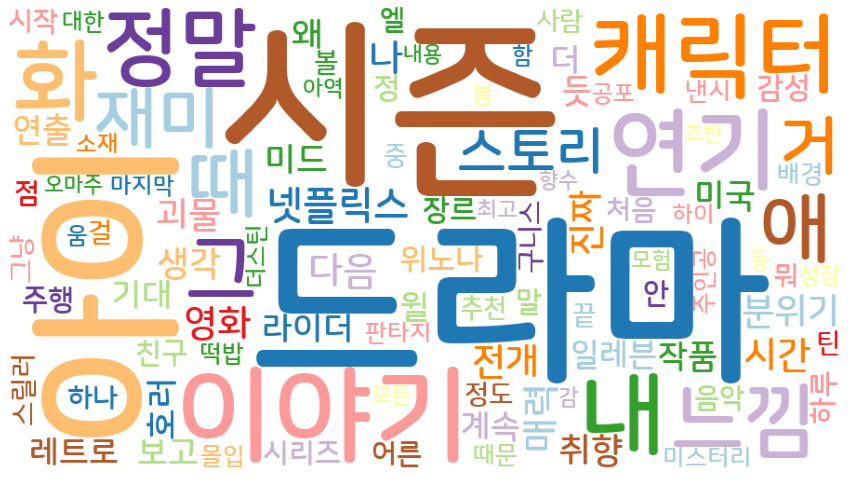

In [ ]:
wcdraw(df, 'Paired')